In [22]:
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[-4, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[1, -4, 1, 0, 0, 0, 0, 0, 0, 0],
[0, 1, -4, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 1, -4, 1, 0, 0, 0, 0, 0],
[0, 0, 0, 1, -4, 1, 0, 0, 0, 0],
[0, 0, 0, 0, 1, -4, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 1, -4, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 1, -4, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 1, -4, 1],
[0, 0, 0, 0, 0, 0, 0, 0, 1, -4]])
b=np.array([-27,-15,-15,-15,-15,-15,-15,-15,-15,-15])
omega=np.array([0.8, 1.0, 1.1, 1.2, 1.5])
eps=1e-4
ARR_SIZE = A.shape[0]

In [23]:
def solveSOR(A,b,omega, eps):
    it_num=np.zeros(omega.shape[0])
    for k in range(omega.shape[0]):
        x=np.zeros(A.shape[0])
        norm=1e10
        while norm>eps:
            it_num[k] = it_num[k]+1
            x_prev=x.copy()
            for i in range(ARR_SIZE):
                sum1=0
                sum2=0
                for j in range(i):
                    sum1=sum1+A[i,j]*x[j]
                for j in range(i+1,ARR_SIZE):
                    sum2=sum2+A[i,j]*x_prev[j]
                x[i]=(1-omega[k])*x_prev[i] + omega[k]*(b[i]-sum1-sum2)/A[i,i]
            norm=max(abs(x-x_prev))
    return x, it_num

In [24]:
sol,steps = solveSOR(A,b,omega,eps)
print(sol)

[ 8.70576935  7.8230216   7.58635328  7.52244041  7.50343219  7.49130032
  7.46178059  7.35583193  6.96155436  5.49038737]


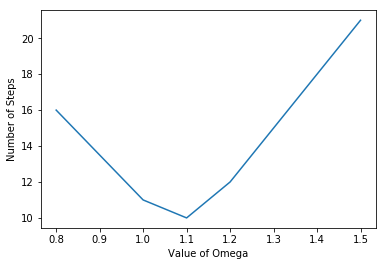

In [25]:
plt.plot(omega,steps)
plt.xlabel('Value of Omega')
plt.ylabel('Number of Steps')
plt.show()